### Exercici 1
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 100)


In [2]:
# Importamos el archivo CSV y eliminamos las columnas que no interesan. En este caso, la salida programada, 
# la salida real, las operadoras de vuelo y los vuelos cancelados

file = pd.read_csv('DelayedFlights.csv', index_col=0, sep=',', encoding='utf8')
file
file.drop(['ArrTime','CRSArrTime','FlightNum','TailNum','ActualElapsedTime',
           'CRSElapsedTime','AirTime','ArrDelay','DepDelay','Origin','Dest','Distance',
          'TaxiIn', 'TaxiOut','CancellationCode', 'Diverted','WeatherDelay',
           'NASDelay','SecurityDelay','LateAircraftDelay'],axis = 'columns', inplace=True)
file

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,Cancelled,CarrierDelay
0,2008,1,3,4,2003.0,1955,WN,0,NaN
1,2008,1,3,4,754.0,735,WN,0,NaN
2,2008,1,3,4,628.0,620,WN,0,NaN
4,2008,1,3,4,1829.0,1755,WN,0,2.0
5,2008,1,3,4,1940.0,1915,WN,0,NaN
...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,DL,0,3.0
7009717,2008,12,13,6,657.0,600,DL,0,0.0
7009718,2008,12,13,6,1007.0,847,DL,0,1.0
7009726,2008,12,13,6,1251.0,1240,DL,0,NaN


### Exercici 2
Fes un informe complet del data set:.

Resumeix estadísticament les columnes d’interès
Troba quantes dades faltants hi ha per columna
Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
Taula de les aerolínies amb més endarreriments acumulats
Quins són els vols més llargs? I els més endarrerits?
Etc.

In [3]:
# Sacamos la cantidad de vuelos por compañía y se muestra en un gráfico de barras.
total_flights = file['UniqueCarrier'].value_counts()
total_flights

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64

<AxesSubplot:>

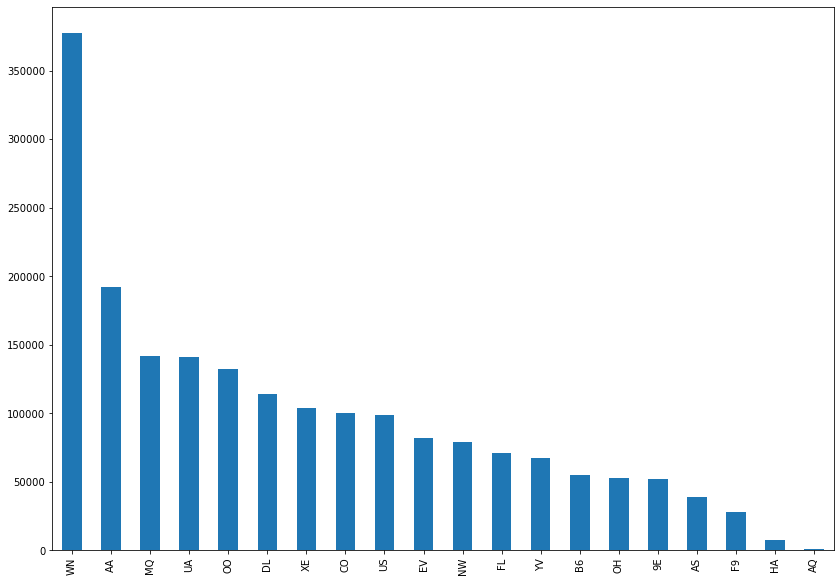

In [4]:
total_flights.plot(kind='bar', figsize =(14, 10))

In [5]:
canceled_flights = file[['UniqueCarrier', 'Cancelled']]
canceled_flights ['Cancelled'] == 1

0          False
1          False
2          False
4          False
5          False
           ...  
7009710    False
7009717    False
7009718    False
7009726    False
7009727    False
Name: Cancelled, Length: 1936758, dtype: bool

In [59]:
# Sacamos el total de vuelos cancelados.
canceled_flights['Cancelled'].value_counts(False)

0    1936125
1        633
Name: Cancelled, dtype: int64

In [85]:
# Sacamos el tiempo de retraso de cada vuelo
delay_minutes = file['DepTime'] - file['CRSDepTime']
delay_minutes

0           48.0
1           19.0
2            8.0
4           74.0
5           25.0
           ...  
7009710     30.0
7009717     57.0
7009718    160.0
7009726     11.0
7009727      7.0
Length: 1936758, dtype: float64

In [86]:
delay_minutes = file[['CRSDepTime', 'DepTime']].copy()
delay_minutes

,CRSDepTime,DepTime
0,1955,2003.0
1,735,754.0
2,620,628.0
4,1755,1829.0
5,1915,1940.0
...,...,...
7009710,1220,1250.0
7009717,600,657.0
7009718,847,1007.0
7009726,1240,1251.0


In [99]:
# sacamos el retraso de salida de cada vuelo y lo añadimos en una nueva columna al df
time = delay_minutes['DepTime'] - delay_minutes['CRSDepTime']
time
delay_minutes.loc[:,'Minutes Delayed'] = time
delay_minutes

,CRSDepTime,DepTime,Minutes Delayed
0,1955,2003.0,48.0
1,735,754.0,19.0
2,620,628.0,8.0
4,1755,1829.0,74.0
5,1915,1940.0,25.0
...,...,...,...
7009710,1220,1250.0,30.0
7009717,600,657.0,57.0
7009718,847,1007.0,160.0
7009726,1240,1251.0,11.0


### Exercici 3
Exporta el data set net i amb les noves columnes a Excel.